In [ ]:
# Only 1 data set
# interpolating function f = g(t)-g(t+T) 
# full data identification (time window defined but not used )
# Identifies "a couple" on the full data set ( it also works on a smaller data window )

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pprint

import cma

In [35]:
# import data
data_frame = pd.read_csv('All_data.csv', sep=',')

In [36]:
data = data_frame.to_numpy()
t, v = data[:, 0], data[:, 1]

In [37]:
# data_frame2 = pd.read_csv('t0.csv', sep=',')

In [38]:
# data2 = data_frame2.to_numpy()
# t0_idx, t0  = data2[:, 0], data2[:, 1]
# t0_idx = np.array([int(t0_id) for t0_id in t0_idx])

<IPython.core.display.Javascript object>


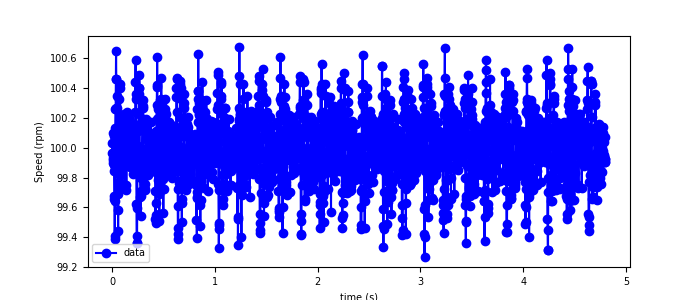

Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'Speed (rpm)')

In [42]:
plt.rcParams['figure.figsize'] = [7, 3];
# %matplotlib notebook

#plt.plot(t, v, 'b-o', t[t0_idx], 100*np.ones(len(t0)),'r*')
plt.plot(t, v, 'b-o')
plt.xlabel('time (s)')
plt.ylabel('Speed (rpm)')
plt.legend(['data'])
plt.show()

In [44]:
# A = 0.6
# t0  = 0.216
# omega = 2*np.pi*26
# c = 100
# t1 = 0.41
# t2 = 0.216
# T = 0.5
# TT = 1
# n_max = 5


def media(v):
   return sum(v)/len(v)

def RMSE(v,v_hat):
      return np.sqrt(((v-v_hat)**2).mean())

def step(x):
    return 1*(x>0)


# Interpolating function:  f = single positive + single negative = g(t) - g(t-T)
# single positive:  g = A *step(t-(t0+t2)) *step(t1-(t-t0)) *np.exp(-1*(t-(t0+t2)*tau) *np.sin(omega*(t-t0))
# single negative: -g

# single positive
def g(A, t0, tau, omega, c, t1, t2): # c not used here
    return A *step(t-t0-t2) *step(t1-(t-t0)) *np.exp(-1*(t-t0-t2)*tau) *np.sin(omega*(t-t0))

# single positive + single negative
def f(A, t0, tau, omega, c, t1, t2, T): 
    return (g(A, t0, tau, omega, c, t1, t2) - g(A, t0+T, tau, omega, c, t1, t2)) + c

# objective functioin
def obj(par):
    [A, t0, tau, omega, c, t1, t2, T] = par
    return RMSE(v, f(A, t0, tau, omega, c, t1, t2, T))


<IPython.core.display.Javascript object>


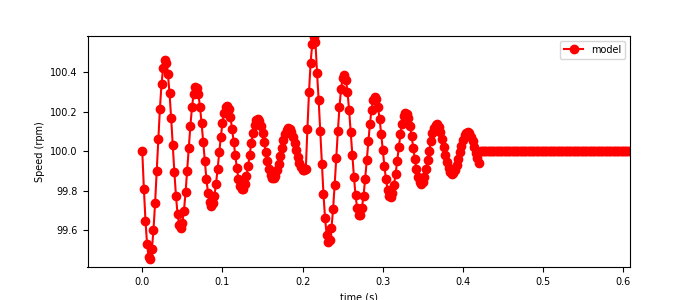

Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'Speed (rpm)')

In [43]:
# for debug:
# interpolating function plot

#plt.rcParams['figure.figsize'] = [6, 3]
# %matplotlib inline

# expected parameters value
A =-0.6
t0  = 0
tau = 9
omega = 2*np.pi*26
c = 100
t1 = 0.218
t2 = 0
T = 0.204
# TT = 0.422
# n_max = 12

# par = [A, t0, tau, omega, c, t1, t2, T]

plt.plot(t, f(A, t0,tau, omega, c, t1, t2, T), '-ro') #,t, v, 'b-o')
plt.xlabel('time (s)')
plt.ylabel('Speed (rpm)')
plt.legend(['model','data'])
plt.show()

<IPython.core.display.Javascript object>


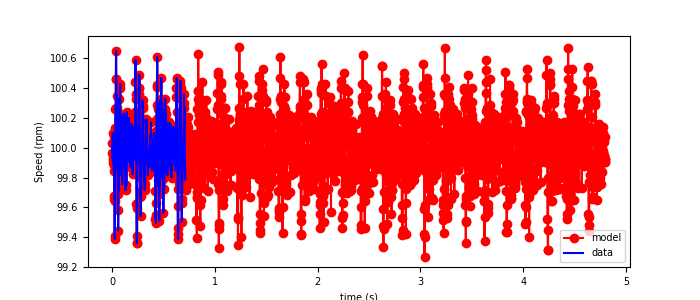

Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'Speed (rpm)')

In [23]:
# selecting a time window of the signal -- NOT USED 

T  = 0.204  
dT = 0.002  # sampling period

window_samples = int(3.5*T/0.002)

v_w = v[0:window_samples]
t_w = t[0:window_samples]


plt.plot(t,v, '-ro',t_w,v_w,'-b')#,t, v, 'b-o')
plt.xlabel('time (s)')
plt.ylabel('Speed (rpm)')
plt.legend(['model','data'])
plt.show()

# t = t_w
# v = v_w


In [45]:
# domain of the variables 

#domain= [[m0, m1, m2, m3, m4, m5, m6, m7, m8],[M0, M1, M2, M3, M4, M5, M6, M7, M8]]

A_b = [-(max(v)-min(v))/2, (max(v)-min(v))/2]
t0_b = [min(t), max(t)]
tau_b = [5, 30]
omega_b = [ 2*np.pi*1, 2*np.pi*40]
c_b = [min(v), max(v)]
t1_b = [0, 0.204]   # to be set 
t2_b = [0, 0.204/2] # to be set
T_b = [min(t), max(t)] # to be set

domain = np.array([[A_b[0], t0_b[0], tau_b[0], omega_b[0], c_b[0], t1_b[0], t2_b[0], T_b[0]], [A_b[1], t0_b[1], tau_b[1], omega_b[1], c_b[1], t1_b[1], t2_b[1], T_b[1]]] )


In [46]:
# optimization

#x0 = (m+M)/2
#sigma0 = (M-m)/4
x0 = (domain[0]+domain[1])/2
sigma0 = (domain[1]-domain[0])/4    

#res = cma.CMAEvolutionStrategy(x0, 1, inopts={'popsize':2000, 'CMA_stds':sigma0,'fixed_variables':{5:0.218, 6:0, 7:0.204}}) 
res = cma.CMAEvolutionStrategy(x0, 1, inopts = {'popsize':2500, 'CMA_stds':sigma0, 'bounds':[domain[0], domain[1]], 'fixed_variables':{ 7:0.204}}) 
res.optimize(obj, iterations=2000)

(1250_w,2500)-aCMA-ES (mu_w=631.0,w_1=0%) in dimension 7 (seed=845161, Mon Mar  4 17:05:11 2019)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   2500 2.156301838949504e-01 1.0e+00 1.01e+00  3e-02  6e+01 0:02.5
    2   5000 2.130723546306617e-01 4.5e+00 9.87e-01  3e-02  6e+01 0:04.6
    3   7500 2.136063702813412e-01 1.5e+01 1.03e+00  1e-02  6e+01 0:06.7
    5  12500 2.138727213091992e-01 5.1e+01 1.03e+00  6e-03  5e+01 0:10.8
    7  17500 2.134351148915481e-01 9.2e+01 1.13e+00  4e-03  5e+01 0:14.9
   10  25000 2.131039257964557e-01 1.4e+02 1.27e+00  3e-03  4e+01 0:21.2
   11  27500 2.134103362361249e-01 1.5e+02 1.30e+00  3e-03  3e+01 1:07.1
   15  37500 2.119522729278525e-01 2.1e+02 1.44e+00  3e-03  2e+01 1:15.3
   19  47500 2.114559783816497e-01 2.1e+02 1.60e+00  3e-03  2e+01 1:23.5
   21  52500 2.105856098559747e-01 2.6e+02 1.63e+00  2e-03  2e+01 2:11.5
   26  65000 2.112927193012768e-01 2.8e+02 1.83e+00  2e-03  1e+01 2:21.9
   31  77500 2.1123667114274

<IPython.core.display.Javascript object>


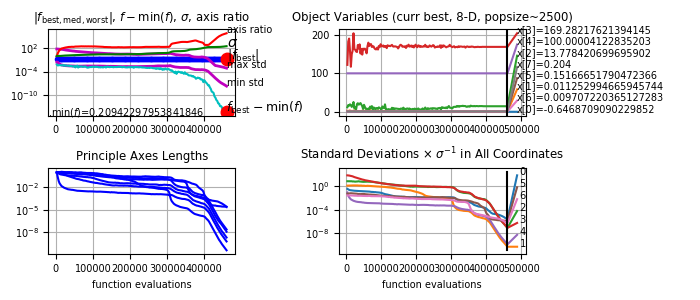

In [47]:
%matplotlib notebook
cma.plot()

In [48]:
res.result_pretty()

termination on tolfunhist=1e-12
final/bestever f-value = 2.094230e-01 2.094230e-01
incumbent solution: [-0.6478318109769904, 0.011252997830533906, 13.778419324309741, 169.28218969313815, 100.00004123224919, 0.1516372505386489, 0.009599569050237186, 0.204]
std deviation: [0.0007443741802686434, 1.8623032289135743e-08, 2.8559725014607895e-05, 2.7771354109069472e-05, 4.655206756934949e-08, 0.00040103199626808625, 0.00015587649794144724]


CMAEvolutionStrategyResult(xbest=array([-6.46870909e-01,  1.12529947e-02,  1.37784207e+01,  1.69282176e+02,
        1.00000041e+02,  1.51666518e-01,  9.70722037e-03,  2.04000000e-01]), fbest=0.20942297953841846, evals_best=458327, evaluations=460000, iterations=184, xfavorite=array([-6.50627822e-01, -2.55951554e-03,  1.37784193e+01,  1.69282190e+02,
        1.00000268e+02,  3.76489581e-01, -6.18317891e-03,  2.04000000e-01]), stds=array([7.44374180e-04, 1.86230323e-08, 2.85597250e-05, 2.77713541e-05,
       4.65520676e-08, 4.01031996e-04, 1.55876498e-04]))

In [52]:
out = res.result.xbest

print('out = [A, t0, tau, omega, c, t1, t2, T] =')
print('    = ', out ) 
print('expected values = [-0.6, 0, 9, 2*pi*26, 100, 0.218, 0, 0.204]')
print('error =', obj(out))

out = [A, t0, tau, omega, c, t1, t2, T] =
    =  [-6.46870909e-01  1.12529947e-02  1.37784207e+01  1.69282176e+02
  1.00000041e+02  1.51666518e-01  9.70722037e-03  2.04000000e-01]
expected = [-0.6, 0, 9, 2*pi*26, 100, 0.218, 0, 0.204]
error = 0.20942297953841846


<IPython.core.display.Javascript object>


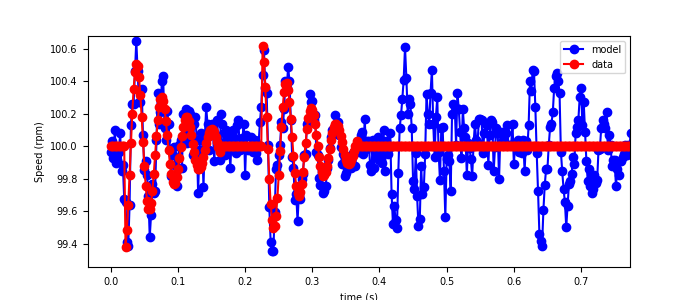

Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'Speed (rpm)')

In [53]:
# plot identification results

[A, t0, tau, omega, c, t1, t2, T] = out

#plt.plot(t, h(out), '-ro')
plt.plot(t, v, 'b-o', t, f(A, t0, tau, omega, c, t1, t2, T), '-ro')
plt.xlabel('time (s)')
plt.ylabel('Speed (rpm)')
plt.legend(['model','data'])
plt.show()

<IPython.core.display.Javascript object>


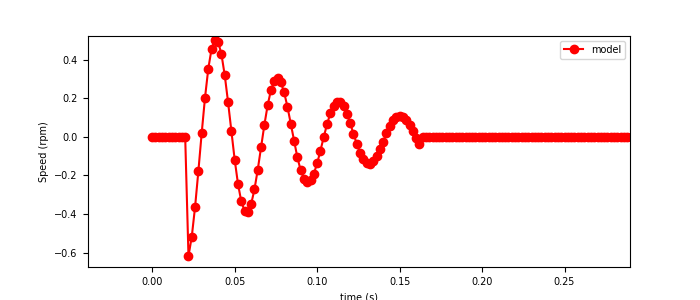

Text(0.5, 0, 'time (s)')

Text(0, 0.5, 'Speed (rpm)')

In [54]:
# for debug - displays half of the identified function 
plt.plot(t, g(A, t0,tau, omega, c, t1, t2), '-ro')#,t, v, 'b-o')
plt.xlabel('time (s)')
plt.ylabel('Speed (rpm)')
plt.legend(['model','data'])
plt.show()